In [2]:
# Import des librairies nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurer l'affichage de pandas pour voir plus de colonnes
pd.set_option('display.max_columns', None)

# Charger le dataset
try:
    df = pd.read_csv('online_shoppers_intention.csv')
    print("Dataset chargé avec succès !")
except FileNotFoundError:
    print("Erreur : Le fichier 'online_shoppers_intention.csv' n'a pas été trouvé.")
    print("Assurez-vous qu'il se trouve dans le même dossier que votre notebook.")
    # Quitter ou gérer l'erreur si le fichier n'est pas trouvé
    exit()

# --- 1. Compréhension Initiale des Données ---

print("\n--- Aperçu des 5 premières lignes du dataset ---")
print(df.head())

print("\n--- Aperçu des 5 dernières lignes du dataset ---")
print(df.tail())

print("\n--- Informations générales sur le dataset (types de données, valeurs non nulles) ---")
df.info()

print("\n--- Statistiques descriptives pour les colonnes numériques ---")
print(df.describe())

print("\n--- Vérification des valeurs manquantes par colonne ---")
print(df.isnull().sum())

print("\n--- Vérification des doublons ---")
print(f"Nombre de lignes dupliquées : {df.duplicated().sum()}")



Dataset chargé avec succès !

--- Aperçu des 5 premières lignes du dataset ---
   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb 

In [3]:
# Comprendre la variable cible (Target variable)
# La dernière colonne est 'Revenue', elle indique si un achat a été effectué (True) ou non (False)
# Dans notre cas, 'False' signifie un abandon de panier (pas de revenu généré)
# et 'True' signifie un achat réussi.
# Pour le problème d'abandon de panier, nous voulons prédire 'False'.
print("\n--- Distribution de la variable cible 'Revenue' ---")
print(df['Revenue'].value_counts())
print(f"Proportion de paniers abandonnés (Revenue=False) : {df['Revenue'].value_counts(normalize=True)[False]:.2f}")
print(f"Proportion d'achats finalisés (Revenue=True) : {df['Revenue'].value_counts(normalize=True)[True]:.2f}")




--- Distribution de la variable cible 'Revenue' ---
Revenue
False    10422
True      1908
Name: count, dtype: int64
Proportion de paniers abandonnés (Revenue=False) : 0.85
Proportion d'achats finalisés (Revenue=True) : 0.15


In [4]:
# --- 2. Première Phase de Nettoyage et Préparation ---

# Gérer les valeurs manquantes
# D'après df.info() et df.isnull().sum(), il semble y avoir des valeurs manquantes
# dans 'OperatingSystems', 'Browser', 'Region', 'TrafficType'.

# Stratégie : Pour simplifier, nous allons imputer ces valeurs manquantes avec le mode (valeur la plus fréquente)
# C'est une stratégie simple pour les variables catégorielles.
for col in ['OperatingSystems', 'Browser', 'Region', 'TrafficType']:
    if df[col].isnull().any():
        mode_val = df[col].mode()[0] # [0] car mode() peut retourner plusieurs modes
        df[col].fillna(mode_val, inplace=True)
        print(f"Colonnes '{col}' : Valeurs manquantes imputées avec le mode '{mode_val}'.")

print("\n--- Re-vérification des valeurs manquantes après imputation ---")
print(df.isnull().sum())

# Gérer les doublons (si présents)
if df.duplicated().any():
    initial_rows = df.shape[0]
    df.drop_duplicates(inplace=True)
    rows_after_duplicates = df.shape[0]
    print(f"\nDoublons supprimés. Nombre de lignes initiales : {initial_rows}, après suppression : {rows_after_duplicates}")
else:
    print("\nAucun doublon trouvé, ou déjà géré.")





--- Re-vérification des valeurs manquantes après imputation ---
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Doublons supprimés. Nombre de lignes initiales : 12330, après suppression : 12205



--- Visualisation de la distribution des pages vues (Administrative, Informational, ProductRelated) ---


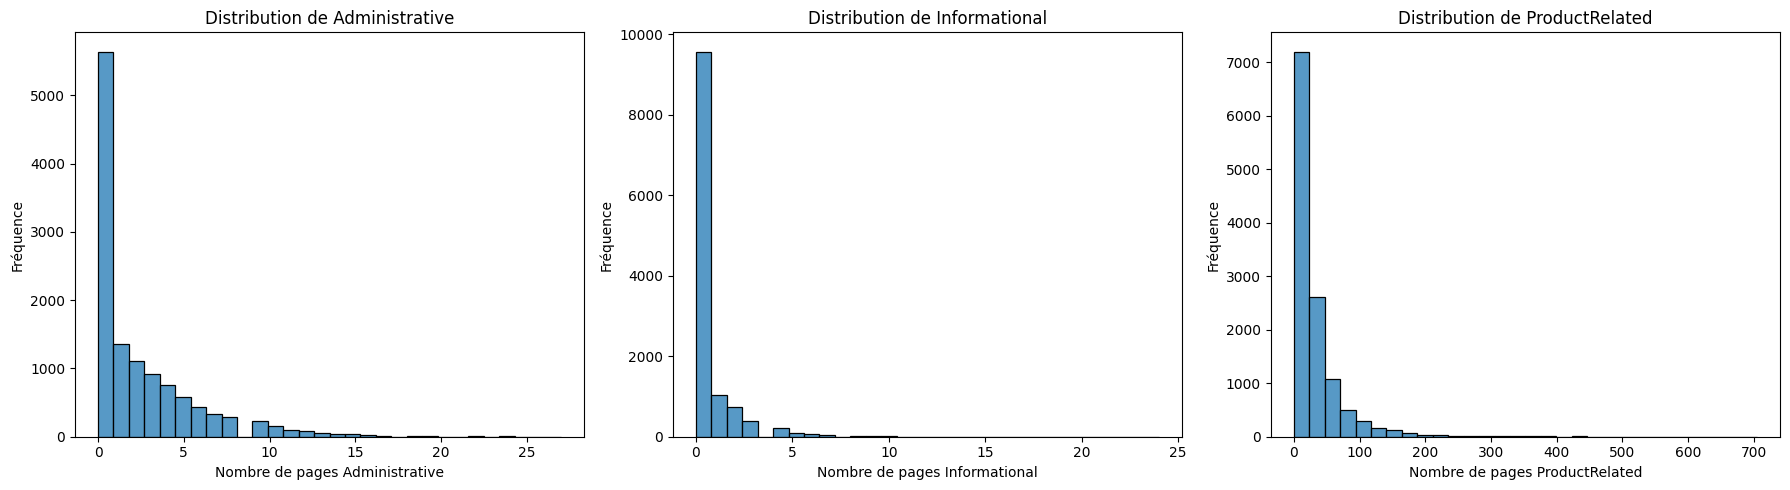

In [5]:
# --- 3. Exploration Approfondie (Pré-traitement continuera après cette phase) ---

# Visualisation simple de quelques colonnes
print("\n--- Visualisation de la distribution des pages vues (Administrative, Informational, ProductRelated) ---")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df['Administrative'], bins=30, ax=axes[0])
axes[0].set_title('Distribution de Administrative')
axes[0].set_xlabel('Nombre de pages Administrative')
axes[0].set_ylabel('Fréquence')

sns.histplot(df['Informational'], bins=30, ax=axes[1])
axes[1].set_title('Distribution de Informational')
axes[1].set_xlabel('Nombre de pages Informational')
axes[1].set_ylabel('Fréquence')

sns.histplot(df['ProductRelated'], bins=30, ax=axes[2])
axes[2].set_title('Distribution de ProductRelated')
axes[2].set_xlabel('Nombre de pages ProductRelated')
axes[2].set_ylabel('Fréquence')

plt.tight_layout()
plt.show()




--- Relation entre le temps passé et le revenu (True/False) ---


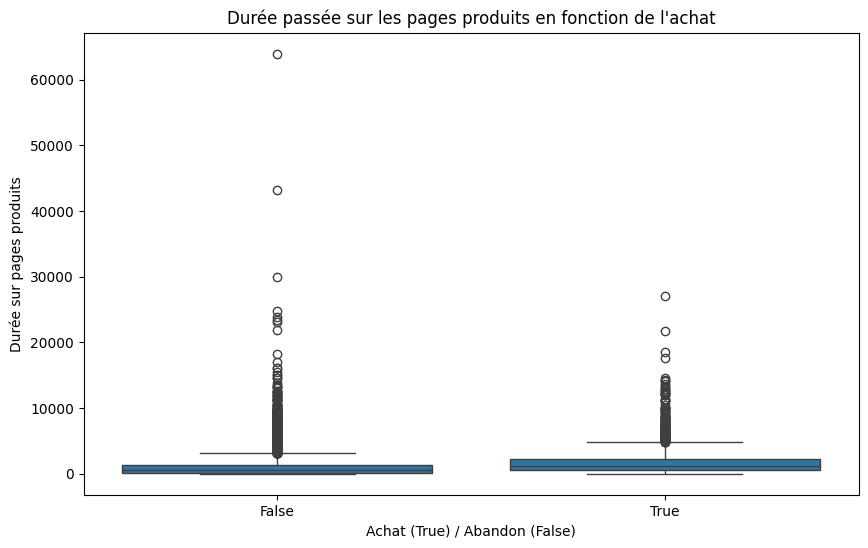

In [6]:
# Relations entre le temps passé sur les pages et la variable cible
print("\n--- Relation entre le temps passé et le revenu (True/False) ---")
plt.figure(figsize=(10, 6))
sns.boxplot(x='Revenue', y='ProductRelated_Duration', data=df)
plt.title('Durée passée sur les pages produits en fonction de l\'achat')
plt.xlabel('Achat (True) / Abandon (False)')
plt.ylabel('Durée sur pages produits')
plt.show()




--- Relation entre le mois et la proportion d'achats ---


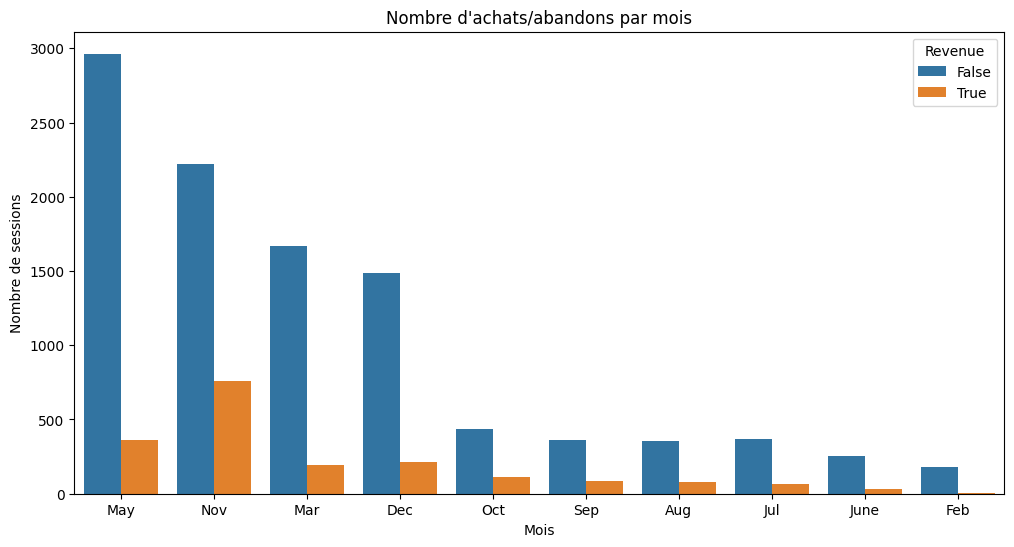

In [7]:
# Relation avec les mois
print("\n--- Relation entre le mois et la proportion d'achats ---")
plt.figure(figsize=(12, 6))
sns.countplot(x='Month', hue='Revenue', data=df, order=df['Month'].value_counts().index)
plt.title('Nombre d\'achats/abandons par mois')
plt.xlabel('Mois')
plt.ylabel('Nombre de sessions')
plt.show()



--- Relation entre le type de trafic et la proportion d'achats ---


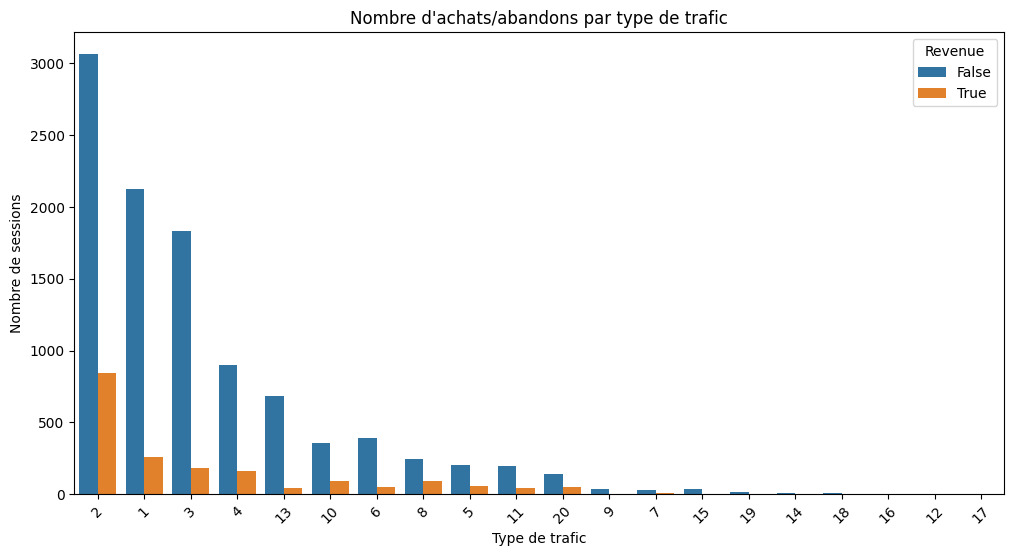


--- Nettoyage et Exploration Initiale Terminés ---
Dimensions du dataset après nettoyage : (12205, 18)


In [8]:
# Relation avec le type de trafic
print("\n--- Relation entre le type de trafic et la proportion d'achats ---")
plt.figure(figsize=(12, 6))
sns.countplot(x='TrafficType', hue='Revenue', data=df, order=df['TrafficType'].value_counts().index)
plt.title('Nombre d\'achats/abandons par type de trafic')
plt.xlabel('Type de trafic')
plt.ylabel('Nombre de sessions')
plt.xticks(rotation=45)
plt.show()

print("\n--- Nettoyage et Exploration Initiale Terminés ---")
print(f"Dimensions du dataset après nettoyage : {df.shape}")

In [9]:


# --- 1. Encodage des Variables Catégorielles ---

# Identifier les colonnes catégorielles
# Certaines sont déjà identifiées numériquement mais sont en fait catégorielles (OperatingSystems, Browser, Region, TrafficType)
# 'Month', 'VisitorType', 'Weekend' sont clairement catégorielles.
# 'Revenue' est notre variable cible binaire.

categorical_cols = [
    'Month',
    'OperatingSystems',
    'Browser',
    'Region',
    'TrafficType',
    'VisitorType',
    'Weekend' # 'Weekend' est booléen, il sera encodé 0/1 par Pandas
]

print("\n--- Encodage des variables catégorielles avec One-Hot Encoding ---")

# Appliquer One-Hot Encoding
# La fonction get_dummies de Pandas est parfaite pour cela
# drop_first=True évite la multicolinéarité (dummy variable trap)
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("\n--- Aperçu du DataFrame après encodage ---")
print(df_encoded.head())
print(f"Dimensions du DataFrame après encodage : {df_encoded.shape}")




--- Encodage des variables catégorielles avec One-Hot Encoding ---

--- Aperçu du DataFrame après encodage ---
   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay  Revenue  Month_Dec  \
0         0.20       0.20  

In [10]:
# --- 2. Séparation des Caractéristiques (X) et de la Variable Cible (y) ---

# La variable cible est 'Revenue'
X = df_encoded.drop('Revenue', axis=1) # Caractéristiques
y = df_encoded['Revenue']             # Variable cible

print(f"\nDimensions de X (caractéristiques) : {X.shape}")
print(f"Dimensions de y (variable cible) : {y.shape}")




Dimensions de X (caractéristiques) : (12205, 68)
Dimensions de y (variable cible) : (12205,)


In [11]:
# --- 3. Division du Dataset en Ensembles d'Entraînement et de Test ---

from sklearn.model_selection import train_test_split

# Split les données en 80% entraînement et 20% test
# stratify=y est important car notre dataset est déséquilibré (Revenue False/True)
# Cela garantit que la proportion de True/False est la même dans les ensembles d'entraînement et de test.
# random_state=42 assure la reproductibilité des résultats.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\n--- Dimensions des ensembles après split ---")
print(f"X_train (entraînement) : {X_train.shape}")
print(f"X_test (test)       : {X_test.shape}")
print(f"y_train (entraînement) : {y_train.shape}")
print(f"y_test (test)       : {y_test.shape}")

# Vérifier la proportion de la variable cible dans les ensembles train et test
print("\n--- Proportion de 'Revenue' dans y_train ---")
print(y_train.value_counts(normalize=True))
print("\n--- Proportion de 'Revenue' dans y_test ---")
print(y_test.value_counts(normalize=True))




--- Dimensions des ensembles après split ---
X_train (entraînement) : (9764, 68)
X_test (test)       : (2441, 68)
y_train (entraînement) : (9764,)
y_test (test)       : (2441,)

--- Proportion de 'Revenue' dans y_train ---
Revenue
False    0.843712
True     0.156288
Name: proportion, dtype: float64

--- Proportion de 'Revenue' dans y_test ---
Revenue
False    0.843507
True     0.156493
Name: proportion, dtype: float64


In [12]:
# --- 4. Mise à l'échelle des Variables Numériques (StandardScaler) ---

# Identifier les colonnes numériques qui NE SONT PAS des colonnes issues de One-Hot Encoding
# (les colonnes One-Hot Encoding sont déjà binaires 0/1, pas besoin de les scaler)
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()

# Exclure les colonnes binaires issues de l'encodage pour ne scaler que les vraies numériques
# Une façon de faire est d'exclure 'Weekend_True' et les colonnes créées par get_dummies
# On peut aussi les identifier en examinant `df_encoded.columns` et en excluant ce qui est du One-Hot.
# Pour la simplicité ici, on va prendre toutes les colonnes numériques sauf celles qui semblent être des OHE binaires évidentes
# (celles qui finissent par '_True' ou '_[valeur]') ou les colonnes 'Durations' et 'PageValues' etc.

# Liste des colonnes numériques originales (avant OHE)
original_numerical_cols = [
    'Administrative', 'Administrative_Duration',
    'Informational', 'Informational_Duration',
    'ProductRelated', 'ProductRelated_Duration',
    'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'
]

# Assurez-vous que ces colonnes sont bien présentes dans X_train
numerical_cols_to_scale = [col for col in original_numerical_cols if col in X_train.columns]


print(f"\n--- Colonnes numériques à mettre à l'échelle : {numerical_cols_to_scale} ---")

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Appliquer le scaler UNIQUEMENT sur X_train pour APPRENDRE les paramètres de scaling (moyenne, écart-type)
X_train[numerical_cols_to_scale] = scaler.fit_transform(X_train[numerical_cols_to_scale])

# Appliquer le même scaler (AVEC LES MÊMES PARAMÈTRES APPRIS SUR X_train) sur X_test
X_test[numerical_cols_to_scale] = scaler.transform(X_test[numerical_cols_to_scale])

print("\n--- Aperçu de X_train après mise à l'échelle (premières lignes) ---")
print(X_train.head())

print("\n--- Préparation des données terminée ---")


--- Colonnes numériques à mettre à l'échelle : ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'] ---

--- Aperçu de X_train après mise à l'échelle (premières lignes) ---
       Administrative  Administrative_Duration  Informational  \
7556         1.689206                 0.676238       0.381750   
11924       -0.699498                -0.458067      -0.397879   
3306        -0.699498                -0.458067      -0.397879   
207         -0.102322                -0.235218      -0.397879   
4460        -0.699498                -0.458067      -0.397879   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
7556                -0.243015        0.220868                -0.080395   
11924               -0.243015       -0.046900                -0.158842   
3306                -0.243015       -0.426237                -0.408089   
20

In [13]:
print("\n--- Aperçu de X_train après mise à l'échelle (premières lignes) ---")
print(X_test.head())


--- Aperçu de X_train après mise à l'échelle (premières lignes) ---
       Administrative  Administrative_Duration  Informational  \
11757       -0.699498                -0.458067      -0.397879   
7022        -0.102322                 1.141994      -0.397879   
7281        -0.102322                 0.588769       2.720635   
11373        1.390618                 1.103366      -0.397879   
4799        -0.699498                -0.458067      -0.397879   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
11757               -0.243015       -0.448551                -0.376249   
7022                -0.243015       -0.359295                -0.381034   
7281                 0.452989       -0.069213                 0.467099   
11373               -0.243015       -0.470865                -0.455581   
4799                -0.243015       -0.604748                -0.626730   

       BounceRates  ExitRates  PageValues  SpecialDay  Month_Dec  Month_Feb  \
11757    -0.0065

In [14]:

# Assurez-vous que X_train, X_test, y_train, y_test sont prêts

# --- 1. Choix et Entraînement du Modèle : Régression Logistique ---

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns

print("\n--- Entraînement du modèle de Régression Logistique ---")

# Instancier le modèle
# class_weight='balanced' est TRÈS important ici à cause du déséquilibre de notre dataset.
# Il attribue un poids plus élevé à la classe minoritaire ('True' - achats réussis)
# pour éviter que le modèle ne se contente de prédire toujours la classe majoritaire ('False' - abandons).
# max_iter pour éviter les warnings si le modèle a besoin de plus d'itérations pour converger
model_lr = LogisticRegression(random_state=42, solver='liblinear', class_weight='balanced', max_iter=200)

# Entraîner le modèle sur les données d'entraînement
model_lr.fit(X_train, y_train)

print("Modèle de Régression Logistique entraîné avec succès !")




--- Entraînement du modèle de Régression Logistique ---
Modèle de Régression Logistique entraîné avec succès !


In [15]:
# --- 2. Faire des Prédictions sur l'Ensemble de Test ---

# Prédictions des classes (True/False)
y_pred_lr = model_lr.predict(X_test)

# Prédictions des probabilités (utile pour les courbes ROC/PR)
y_pred_proba_lr = model_lr.predict_proba(X_test)[:, 1] # Probabilité de la classe positive (True)

# --- 3. Évaluation du Modèle ---

print("\n--- Évaluation du Modèle de Régression Logistique ---")

# Rapport de classification
# Donne la précision (precision), le rappel (recall), le F1-score et le support pour chaque classe
print("\nRapport de Classification :")
print(classification_report(y_test, y_pred_lr))




--- Évaluation du Modèle de Régression Logistique ---

Rapport de Classification :
              precision    recall  f1-score   support

       False       0.96      0.86      0.90      2059
        True       0.51      0.80      0.62       382

    accuracy                           0.85      2441
   macro avg       0.73      0.83      0.76      2441
weighted avg       0.89      0.85      0.86      2441




Matrice de Confusion :
[[1763  296]
 [  78  304]]


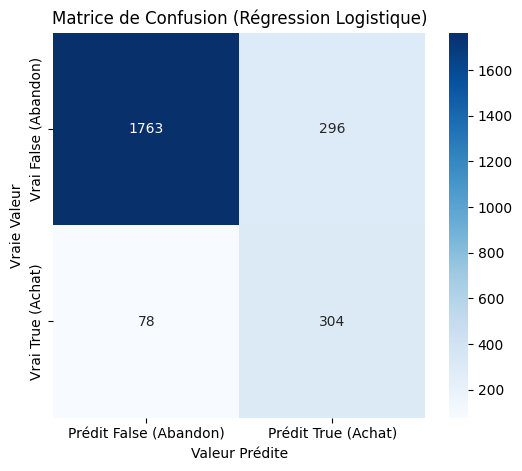


Score AUC-ROC : 0.9096


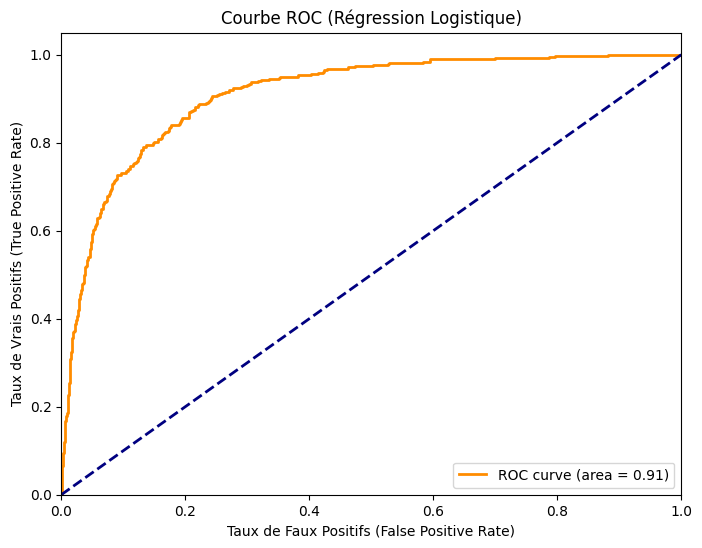

Score PR-AUC (Average Precision) : 0.6628


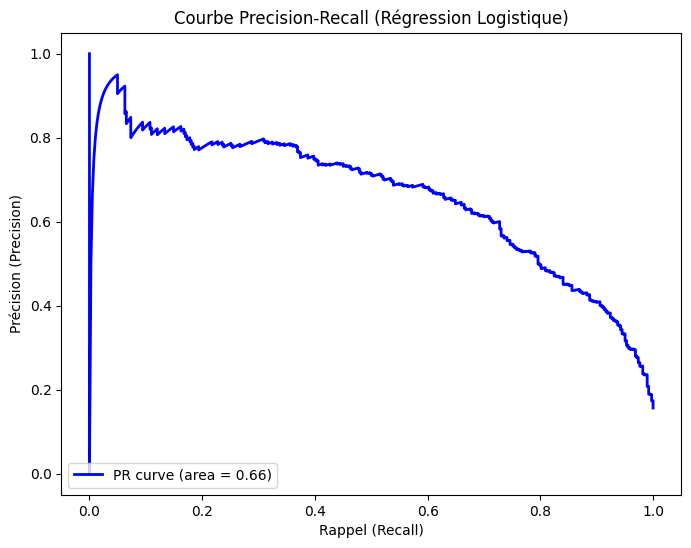


--- Étape de Modélisation et Évaluation Initiale Terminée ---


In [16]:
# Matrice de confusion
# Aide à visualiser les vrais positifs/négatifs et faux positifs/négatifs
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("\nMatrice de Confusion :")
print(cm_lr)

# Visualisation de la Matrice de Confusion
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Prédit False (Abandon)', 'Prédit True (Achat)'],
            yticklabels=['Vrai False (Abandon)', 'Vrai True (Achat)'])
plt.title('Matrice de Confusion (Régression Logistique)')
plt.ylabel('Vraie Valeur')
plt.xlabel('Valeur Prédite')
plt.show()


# AUC-ROC Score
# Mesure la capacité du modèle à distinguer les classes. Une valeur de 0.5 est un hasard, 1.0 est parfait.
roc_auc_lr = roc_auc_score(y_test, y_pred_proba_lr)
print(f"\nScore AUC-ROC : {roc_auc_lr:.4f}")

# Courbe ROC
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_lr:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs (False Positive Rate)')
plt.ylabel('Taux de Vrais Positifs (True Positive Rate)')
plt.title('Courbe ROC (Régression Logistique)')
plt.legend(loc="lower right")
plt.show()

# PR-AUC Score (Average Precision Score)
# Particulièrement utile pour les datasets déséquilibrés
# Représente la précision moyenne pondérée sur chaque seuil.
pr_auc_lr = average_precision_score(y_test, y_pred_proba_lr)
print(f"Score PR-AUC (Average Precision) : {pr_auc_lr:.4f}")

# Courbe Precision-Recall
precision_lr, recall_lr, _ = precision_recall_curve(y_test, y_pred_proba_lr)
plt.figure(figsize=(8, 6))
plt.plot(recall_lr, precision_lr, color='blue', lw=2, label=f'PR curve (area = {pr_auc_lr:.2f})')
plt.xlabel('Rappel (Recall)')
plt.ylabel('Précision (Precision)')
plt.title('Courbe Precision-Recall (Régression Logistique)')
plt.legend(loc="lower left")
plt.show()

print("\n--- Étape de Modélisation et Évaluation Initiale Terminée ---")

In [17]:
# Assurez-vous que y_test, y_pred_lr, y_pred_proba_lr sont définis
# (ils proviennent de l'exécution du code de modélisation précédent)

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print("--- Récapitulatif et Interprétation des Métriques d'Évaluation ---")

# --- 1. La Matrice de Confusion : La Base de Tout ---
# Vos résultats de la Matrice de Confusion :
# Vrai False (Abandon) | Vrai True (Achat)
# ---------------------------------------------
# Prédit False (Abandon) | 1763 (TN)    | 78 (FN)
# Prédit True (Achat)  | 296 (FP)     | 304 (TP)

# Pour rappel, la matrice est structurée comme suit :
# [[TN, FP],
#  [FN, TP]]
TN = 1763
FP = 296
FN = 78
TP = 304

print("\n--- 1. Matrice de Confusion (Valeurs Brutes) ---")
print(f"Vrais Négatifs (TN - Abandon bien prédit) : {TN}")
print(f"Faux Positifs (FP - Abandon prédit à tort comme Achat) : {FP}")
print(f"Faux Négatifs (FN - Achat prédit à tort comme Abandon) : {FN}")
print(f"Vrais Positifs (TP - Achat bien prédit) : {TP}")

print("\nSignification :")
print(f"- **{TN}** sessions d'abandon ont été correctement identifiées.")
print(f"- **{FP}** sessions d'abandon ont été faussement prédites comme des achats (erreurs 'fausse alarme').")
print(f"- **{FN}** sessions d'achat ont été faussement prédites comme des abandons (erreurs 'opportunité manquée').")
print(f"- **{TP}** sessions d'achat ont été correctement identifiées.")

print("\nCe que vous devez regarder :")
print("1. **Les Vrais Positifs (TP)** : C'est le nombre de succès de votre modèle pour la classe d'intérêt (achats).")
print("2. **Les Faux Négatifs (FN)** : C'est le nombre d'erreurs critiques (opportunités d'achat manquées). Très important pour notre cas d'usage.")
print("3. **Les Faux Positifs (FP)** : C'est le nombre de ressources potentiellement gaspillées (cibler des non-acheteurs).")
print("4. Les **Vrais Négatifs (TN)** sont importants mais souvent moins critiques pour un dataset déséquilibré où la classe négative est majoritaire.")

# --- 2. Rapport de Classification (Précision, Rappel, F1-Score) ---

# Re-générons le rapport pour afficher les valeurs
print("\n--- 2. Rapport de Classification ---")
report = classification_report(y_test, y_pred_lr, output_dict=True) # output_dict=True pour faciliter l'accès

# Afficher le rapport formaté (comme vous l'avez vu)
print(classification_report(y_test, y_pred_lr))

print("\nCe que vous devez regarder et leur signification :")

# Métriques pour la classe 'False' (Abandon - classe majoritaire)
print("\n--- Pour la Classe 'False' (Abandon de panier) ---")
print(f"Précision (False) : {report['False']['precision']:.2f}")
print(f"Signification : Quand le modèle dit 'Abandon', il a raison {report['False']['precision']:.0%} du temps. (Beaucoup d'abandons, donc facile à être précis ici).")
print(f"Rappel (False) : {report['False']['recall']:.2f}")
print(f"Signification : Le modèle identifie {report['False']['recall']:.0%} de tous les vrais abandons. (Bonne capacité à capter les abandons).")
print(f"F1-Score (False) : {report['False']['f1-score']:.2f}")
print("Signification : Un bon équilibre entre précision et rappel pour la classe majoritaire. Généralement moins d'intérêt pour l'objectif métier 'prévenir l'abandon'.")


# Métriques pour la classe 'True' (Achat - classe minoritaire, notre intérêt principal !)
print("\n--- Pour la Classe 'True' (Achat finalisé) ---")
print(f"Précision (True) : {report['True']['precision']:.2f}")
print(f"Signification : Quand le modèle dit 'Achat', il a raison {report['True']['precision']:.0%} du temps.")
print("   - C'est-à-dire : Sur 100 clients que vous allez cibler parce que le modèle pense qu'ils vont acheter,")
print(f"     environ {report['True']['precision']*100:.0f} vont réellement acheter, et les autres {100 - report['True']['precision']*100:.0f} sont des 'fausses alarmes' (FP).")
print("   - **À surveiller :** Une faible précision pour la classe positive peut signifier que vous gaspillez des ressources en ciblant des personnes qui n'achèteront pas. Ici, 51% est modéré.")

print(f"Rappel (True) : {report['True']['recall']:.2f}")
print(f"Signification : Le modèle identifie {report['True']['recall']:.0%} de tous les vrais acheteurs (ceux qui ont réellement acheté).")
print("   - C'est-à-dire : Sur 100 clients qui allaient réellement acheter, le modèle en a identifié correctement")
print(f"     {report['True']['recall']*100:.0f}. Les {100 - report['True']['recall']*100:.0f} restants sont des 'opportunités manquées' (FN).")
print("   - **Crucial pour l'objectif métier :** Un rappel élevé est souvent désiré pour la classe positive rare (ici les achats) si le coût d'un FN est élevé (manquer une vente). Ici, 80% est un très bon rappel.")

print(f"F1-Score (True) : {report['True']['f1-score']:.2f}")
print("Signification : Le F1-Score est une moyenne harmonique de la Précision et du Rappel. Il donne un aperçu")
print("   de l'équilibre entre ces deux métriques. Un F1-Score élevé signifie que le modèle a à la fois")
print("   une bonne précision et un bon rappel. Ici, 0.62 est acceptable mais montre la marge d'amélioration.")
print("   - **À surveiller :** Pour les datasets déséquilibrés, le F1-Score de la classe minoritaire est souvent une métrique clé pour évaluer la performance globale.")

print("\n--- Moyennes Globales ---")
print(f"Accuracy (Précision globale) : {report['accuracy']:.2f}")
print("Signification : Proportion de toutes les prédictions correctes. ATTENTION :")
print("   Peut être trompeuse pour les datasets déséquilibrés. Si le modèle prédisait toujours 'False', il")
print(f"   obtiendrait déjà {TN / (TN + FP + FN + TP):.2f} (proportion de la classe majoritaire) de précision.")
print("   Donc 0.85 n'est pas si spectaculaire ici.")

print(f"Macro Avg F1-Score : {report['macro avg']['f1-score']:.2f}")
print("Signification : Moyenne simple des F1-scores de chaque classe. Donne un poids égal à chaque classe.")
print("   Utile si vous considérez que les erreurs sur la classe majoritaire et minoritaire ont la même importance.")

print(f"Weighted Avg F1-Score : {report['weighted avg']['f1-score']:.2f}")
print("Signification : Moyenne des F1-scores pondérée par le nombre d'exemples de chaque classe.")
print("   Reflète la performance globale du modèle en tenant compte du déséquilibre.")


# --- 3. AUC-ROC Score : Évaluation de la capacité de discrimination ---
roc_auc_lr = roc_auc_score(y_test, y_pred_proba_lr)
print(f"\n--- 3. Score AUC-ROC : {roc_auc_lr:.4f} ---")
print("Signification : Mesure la capacité du modèle à distinguer entre les classes 'True' et 'False'.")
print("   - Une valeur de 0.5 est un hasard pur.")
print("   - Une valeur de 1.0 est un classifieur parfait.")
print("   - **Ce que vous devez regarder :** Un score élevé (ici 0.91) est excellent et indique que le modèle est très")
print("     bon pour séparer les acheteurs des non-acheteurs, indépendamment du seuil de classification choisi.")
print("   - **Utilité :** Très bon pour les datasets déséquilibrés car il ne se concentre pas seulement sur la classe minoritaire mais sur la capacité générale à ordonner correctement les exemples.")


# --- 4. PR-AUC (Average Precision) Score : Évaluation ciblée sur la classe positive rare ---
pr_auc_lr = average_precision_score(y_test, y_pred_proba_lr)
print(f"\n--- 4. Score PR-AUC (Average Precision) : {pr_auc_lr:.4f} ---")
print("Signification : L'aire sous la courbe Precision-Recall. C'est la précision moyenne sur tous les seuils de rappel.")
print("   - Plus ce score est élevé, meilleure est la performance du modèle pour la classe positive (minoritaire).")
print(f"   - **Ce que vous devez regarder :** Il est particulièrement RENSEIGNANT pour les datasets déséquilibrés, car il se")
print(f"     concentre directement sur la performance de la classe d'intérêt. Un score de {pr_auc_lr:.2f}")
print(f"     est bien supérieur à la proportion aléatoire de la classe positive (Support True / Total = {TP + FN} / {TN + FP + FN + TP} = {(TP + FN)/(TN + FP + FN + TP):.2f}).")
print("   - **Utilité :** Si votre objectif principal est d'identifier la classe positive rare (les achats) et que les")
print("     faux positifs ont un coût élevé (gaspillage de ressources), la PR-AUC est la métrique à privilégier.")


print("\n--- Synthèse sur le choix des scores à regarder ---")
print("Pour un problème de détection d'opportunités (comme la prédiction d'achats dans les abandons) avec un dataset déséquilibré :")
print("1.  **Recall (Rappel) pour la classe 'True' (Achat)** : Pour s'assurer de ne pas manquer trop d'opportunités. (Ici, 0.80 est très bien).")
print("2.  **Precision (Précision) pour la classe 'True' (Achat)** : Pour évaluer la 'pureté' de vos prédictions positives (limiter les fausses alarmes). (Ici, 0.51 est modéré).")
print("3.  **F1-Score pour la classe 'True' (Achat)** : Pour un équilibre entre Précision et Rappel.")
print("4.  **PR-AUC (Average Precision)** : C'est souvent la meilleure métrique unique pour évaluer la performance globale de la détection de la classe minoritaire sur des datasets déséquilibrés.")
print("5.  **AUC-ROC** : Pour la capacité générale de discrimination du modèle.")
print("\nL'Accuracy seule est rarement suffisante et peut être trompeuse !")

--- Récapitulatif et Interprétation des Métriques d'Évaluation ---

--- 1. Matrice de Confusion (Valeurs Brutes) ---
Vrais Négatifs (TN - Abandon bien prédit) : 1763
Faux Positifs (FP - Abandon prédit à tort comme Achat) : 296
Faux Négatifs (FN - Achat prédit à tort comme Abandon) : 78
Vrais Positifs (TP - Achat bien prédit) : 304

Signification :
- **1763** sessions d'abandon ont été correctement identifiées.
- **296** sessions d'abandon ont été faussement prédites comme des achats (erreurs 'fausse alarme').
- **78** sessions d'achat ont été faussement prédites comme des abandons (erreurs 'opportunité manquée').
- **304** sessions d'achat ont été correctement identifiées.

Ce que vous devez regarder :
1. **Les Vrais Positifs (TP)** : C'est le nombre de succès de votre modèle pour la classe d'intérêt (achats).
2. **Les Faux Négatifs (FN)** : C'est le nombre d'erreurs critiques (opportunités d'achat manquées). Très important pour notre cas d'usage.
3. **Les Faux Positifs (FP)** : C'est 